In [79]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
G = nx.Graph()

In [81]:
df = pd.read_csv('2024.csv')
week_1_df = df
#week_1_df = df[df['Wk'].isin([1, 2])]

In [82]:
print(week_1_df)

       Wk  Day        Date   Time            Home   xG Score  xG.1  \
0     1.0  Fri  2023-08-11  20:00         Burnley  0.3   0–3   1.9   
1     1.0  Sat  2023-08-12  12:30         Arsenal  0.8   2–1   1.2   
2     1.0  Sat  2023-08-12  15:00         Everton  2.7   0–1   1.5   
3     1.0  Sat  2023-08-12  15:00   Sheffield Utd  0.5   0–1   1.9   
4     1.0  Sat  2023-08-12  15:00        Brighton  4.0   4–1   1.5   
..    ...  ...         ...    ...             ...  ...   ...   ...   
375  38.0  Sun  2024-05-19  16:00       Brentford  1.1   2–4   3.4   
376  38.0  Sun  2024-05-19  16:00         Chelsea  1.1   2–1   2.2   
377  38.0  Sun  2024-05-19  16:00  Crystal Palace  2.5   5–0   0.9   
378  38.0  Sun  2024-05-19  16:00       Liverpool  4.5   2–0   0.5   
379  38.0  Sun  2024-05-19  16:00         Burnley  1.2   1–2   1.7   

                Away  Attendance                                   Venue  \
0    Manchester City     21572.0                               Turf Moor   
1    No

In [83]:
edgelist = list(zip(week_1_df['Home'], week_1_df['Away'], week_1_df['cost']))
nodelist = pd.unique(df['Home'])
# Assuming week_1_df is a pandas DataFrame with columns 'Home', 'Away', and 'cost'
weightlist = dict(zip(zip(week_1_df['Home'], week_1_df['Away']), week_1_df['cost']))

In [84]:
G.add_nodes_from(nodelist)
G.add_weighted_edges_from(edgelist)

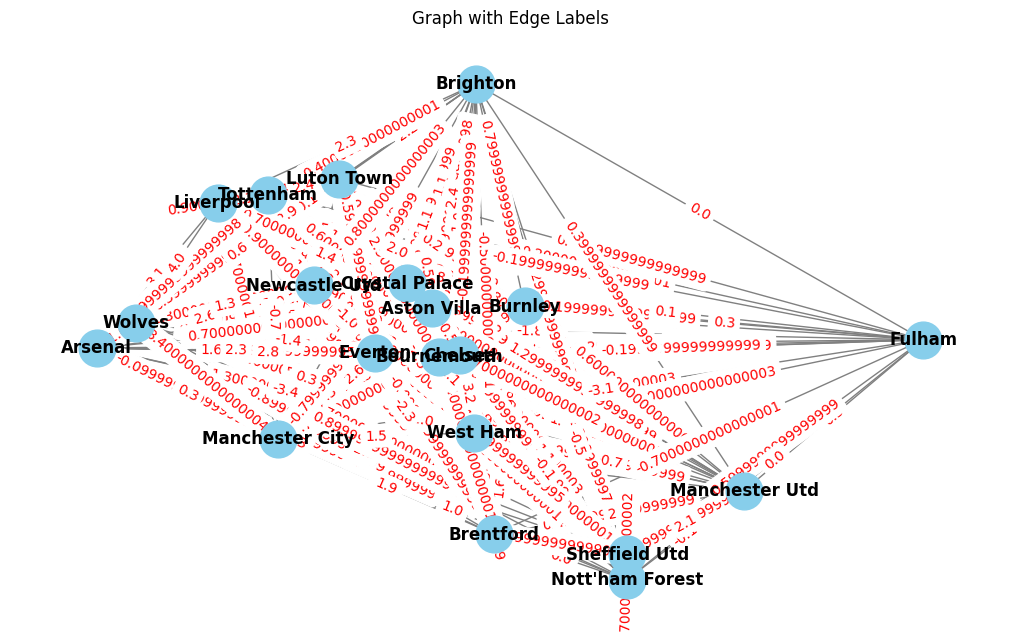

In [87]:
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Positioning the nodes using spring layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=12, font_color='black', font_weight='bold', edge_color='gray')
# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=weightlist, font_color='red')
plt.title("Graph with Edge Labels")
plt.show()

In [95]:
adj_matrix = nx.to_numpy_array(G)

In [97]:
print(adj_matrix)

[[ 0.  -2.   0.4  0.2  0.8  0.4 -2.4  1.7  2.6  0.6 -0.5  0.3  1.5  0.4
   2.   0.3  2.   1.4  2.3  0.2]
 [-2.   0.   2.3 -2.1 -2.9  2.8  2.6  0.3  1.7 -1.  -0.7 -0.4  3.1 -1.
   1.3  0.3  0.7 -3.4  3.   0.4]
 [ 0.4  2.3  0.   1.7  1.1  0.3  1.  -0.1  1.6  1.1 -0.6 -0.3 -0.9  1.5
   1.6  1.3 -0.1  0.8  1.  -0.6]
 [ 0.2 -2.1  1.7  0.  -2.3  2.1  1.6  0.2  1.1  2.1  0.7  0.6  1.2  0.7
  -2.1  1.9 -0.8  0.2  0.3  0.1]
 [ 0.8 -2.9  1.1 -2.3  0.   1.   0.8 -0.5 -0.2  0.4 -0.3  0.   2.3 -0.1
   0.4 -0.8  2.4 -1.6  1.1  2.2]
 [ 0.4  2.8  0.3  2.1  1.   0.   0.  -0.4 -1.1  0.4  0.8 -0.2 -0.1 -1.4
   0.6 -0.7  0.6  0.2  0.9  1.1]
 [-2.4  2.6  1.   1.6  0.8  0.   0.  -2.3  0.9 -0.7  1.   0.2  6.4  1.3
   2.  -1.7 -1.2  2.7  0.5 -0.1]
 [ 1.7  0.3 -0.1  0.2 -0.5 -0.4 -2.3  0.   0.   2.6  0.  -0.7 -1.2 -0.9
   1.3  1.9  0.   0.8 -0.4 -2.5]
 [ 2.6  1.7  1.6  1.1 -0.2 -1.1  0.9  0.   0.   1.5 -0.1  1.4  2.3 -0.3
   0.6  1.2 -0.5  3.2 -0.8  0.8]
 [ 0.6 -1.   1.1  2.1  0.4  0.4 -0.7  2.6  1.5  0.  -0.1